In [1]:
!pip install scikit-network

     |████████████████████████████████| 8.1 MB 4.4 MB/s eta 0:00:01


In [2]:
!pip install spotipy
!pip install python-dotenv

from pathlib import Path
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path=Path('../.env'))

     |████████████████████████████████| 153 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 14.4 MB/s eta 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.10
    Uninstalling urllib3-1.25.10:
      Successfully uninstalled urllib3-1.25.10
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


True

In [3]:
from IPython.display import SVG

import numpy as np
from scipy import sparse
import pandas as pd

from sknetwork.utils import edgelist2adjacency, edgelist2biadjacency
from sknetwork.data import convert_edge_list, load_edge_list
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# spotify credentials for the application:
# "Related Artist Network Visualizer"
client_id = os.getenv('SPOTIFY_CLIENT_ID')
client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')
# create a credential manager and api layer
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Definimos el id del artista por el que empezaremos. En este caso, yo. 

In [5]:
jhook_id = '2vTS6RaNCyjiF0FkQDujjy'

In [6]:
name = sp.artist(jhook_id)

In [7]:
name

{'external_urls': {'spotify': 'https://open.spotify.com/artist/2vTS6RaNCyjiF0FkQDujjy'},
 'followers': {'href': None, 'total': 104},
 'genres': [],
 'href': 'https://api.spotify.com/v1/artists/2vTS6RaNCyjiF0FkQDujjy',
 'id': '2vTS6RaNCyjiF0FkQDujjy',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/cd8fbbec8379ce2b07d1f633297b5cef2c212587',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/143160e6e2579034840a1928d367b2bb48f64bce',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/5d2bd92bec0b5628f6905f7ec61c36776c3669c0',
   'width': 160}],
 'name': 'J Hook',
 'popularity': 1,
 'type': 'artist',
 'uri': 'spotify:artist:2vTS6RaNCyjiF0FkQDujjy'}

### Definimos las funciones que, recursivamente (en profundidad), generarán la red de artistas navegando por la API de Spotify.

In [8]:
def related_network(artist_id, depth=3):
    
    graph = dict()
    _related_network(artist_id, depth, graph)
    return graph

def _related_network(artist_id, depth, graph):
    if depth == 0:
        return
    name = sp.artist(artist_id)['name']
    like_artist = sp.artist_related_artists(artist_id)
    graph[name] = [related['name'] for related in like_artist['artists']]
    [_related_network(related['id'], depth - 1, graph) for related in like_artist['artists']]

In [9]:
# check the base case
related_network(jhook_id, 1)

{'J Hook': ['Shadejay', 'Califato ¾']}

# tomamos la red
network_artist = related_network(jhook_id, 4)

#### Save the network so we can avoid generating it again

In [12]:
import json

In [13]:
with open('network_artist_4.json', 'w') as file:
    json.dump(network_artist, file)

In [14]:
with open('network_artist_4.json', 'r') as file:
    network_artist = json.load(file)

In [26]:
len(network_artist.keys())

201

In [15]:
def nodes(network_dict):
    nodes = []

    # iterate over all the artists in the list
    for artist, related_list in network_dict.items():
        nodes.append(artist)
        nodes.extend(related_list)

    # keep only unique values to assign ids
    nodes = np.unique(nodes)
    # make a dataframe to generate ids
    nodes = pd.DataFrame(nodes, columns=['label'])
    # use the index columns as the id
    nodes['id'] = nodes.index
    return nodes

In [16]:
nodes(network_artist)

,label,id
0,$kyhook,0
1,091,1
2,7 Notas 7 Colores,2
3,995,3
4,9ckles,4
...,...,...
922,daniel sabater,922
923,interrogación amor,923
924,mori,924
925,trashi,925


In [27]:
network_artist

{'J Hook': ['Shadejay', 'Califato ¾'],
 'Shadejay': [],
 'Califato ¾': ['The Gardener',
  'Derby Motoreta’s Burrito Kachimba',
  'Le Parody',
  'Pony Bravo',
  'Rodrigo Cuevas',
  'Baiuca',
  'Enrique Morente',
  'Space Surimi',
  'Maria Arnal i Marcel Bagés',
  'Vera Fauna',
  'Camellos',
  'Mujeres',
  'Soleá Morente',
  'Niño de Elche',
  'S Curro',
  'María José Llergo',
  'Joe Crepúsculo',
  'Lole Y Manuel',
  'Triángulo de Amor Bizarro',
  'Novedades Carminha'],
 'The Gardener': ['S Curro',
  'Le Parody',
  'Califato ¾',
  'Pony Bravo',
  'BRONQUIO',
  'Space Surimi',
  'Vera Fauna',
  'Forza La Mákina!',
  'Baiuca',
  'Derby Motoreta’s Burrito Kachimba',
  'Quentin Gas & Los Zíngaros',
  'Rodrigo Cuevas',
  'El Coleta',
  'Enrique Morente',
  'Queralt Lahoz',
  'Chico Blanco',
  'Lole Y Manuel',
  'Niño de Elche',
  'Pedro LaDroga',
  'Las Grecas'],
 'S Curro': ['Elphomega',
  'Sólo Los Solo',
  'Tremendo',
  'Charly Efe',
  'Chacho Brodas',
  'Acqua Toffana',
  '7 Notas 7 Color

In [17]:
def edges(graph, nodes):
    '''Calculate all the conections between the artists'''
    
    edges = []

    for artist, related_list in graph.items():
        artist_node = nodes['id'][nodes['label'] == artist].values[0]
        for related in related_list:
            related_node = nodes['id'][nodes['label'] == related].values[0]
            edges.append((artist_node, related_node))

    return pd.DataFrame(edges, columns=['Source','Target'])

In [32]:
def edges(graph):
    '''Iterate through the dictionary. 
    For each artist, extend their related artists to create a row for each one.'''
    
    edges = []
    for artist, related_list in graph.items():
        edges.extend(list(zip(np.repeat(artist, len(related_list)), related_list)))
        
    return edges

In [33]:
edges_net = edges(network_artist)

In [34]:
edges_net

[('J Hook', 'Shadejay'),
 ('J Hook', 'Califato ¾'),
 ('Califato ¾', 'The Gardener'),
 ('Califato ¾', 'Derby Motoreta’s Burrito Kachimba'),
 ('Califato ¾', 'Le Parody'),
 ('Califato ¾', 'Pony Bravo'),
 ('Califato ¾', 'Rodrigo Cuevas'),
 ('Califato ¾', 'Baiuca'),
 ('Califato ¾', 'Enrique Morente'),
 ('Califato ¾', 'Space Surimi'),
 ('Califato ¾', 'Maria Arnal i Marcel Bagés'),
 ('Califato ¾', 'Vera Fauna'),
 ('Califato ¾', 'Camellos'),
 ('Califato ¾', 'Mujeres'),
 ('Califato ¾', 'Soleá Morente'),
 ('Califato ¾', 'Niño de Elche'),
 ('Califato ¾', 'S Curro'),
 ('Califato ¾', 'María José Llergo'),
 ('Califato ¾', 'Joe Crepúsculo'),
 ('Califato ¾', 'Lole Y Manuel'),
 ('Califato ¾', 'Triángulo de Amor Bizarro'),
 ('Califato ¾', 'Novedades Carminha'),
 ('The Gardener', 'S Curro'),
 ('The Gardener', 'Le Parody'),
 ('The Gardener', 'Califato ¾'),
 ('The Gardener', 'Pony Bravo'),
 ('The Gardener', 'BRONQUIO'),
 ('The Gardener', 'Space Surimi'),
 ('The Gardener', 'Vera Fauna'),
 ('The Gardener', '

In [40]:
graph = convert_edge_list(edges_net)

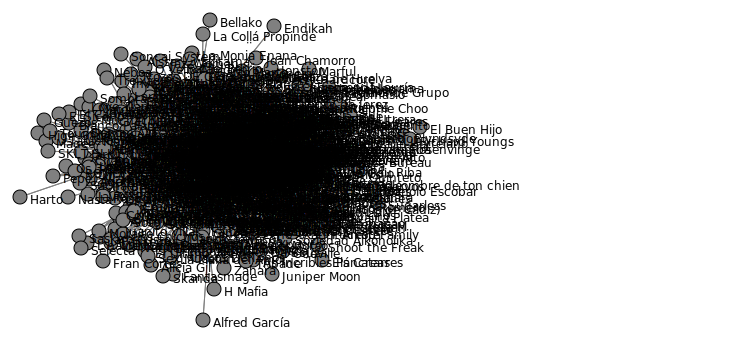

In [41]:
adjacency = graph.adjacency
names = graph.names

image = svg_graph(adjacency, names=names)
SVG(image)